## Linear Regression

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [97]:
df = pd.read_csv('Estuarine_Crocodile.csv')
df.head()

,Species,CommonName,HeadLength,BodyLength
0,Crocodylus porosus,Estuarine Crocodile,24,161
1,Crocodylus porosus,Estuarine Crocodile,24,179
2,Crocodylus porosus,Estuarine Crocodile,32,226
3,Crocodylus porosus,Estuarine Crocodile,35,259
4,Crocodylus porosus,Estuarine Crocodile,40,287


In [98]:
df['BodyLength'].corr(df['HeadLength'])

0.9898911439276338

In [99]:
df.corr()

,HeadLength,BodyLength
HeadLength,1.000000,0.989891
BodyLength,0.989891,1.000000


(-100.0, 1000.0)

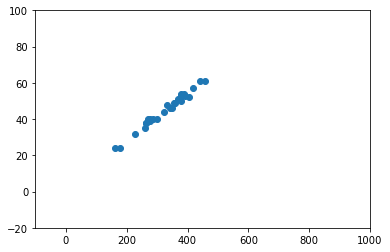

In [100]:
plt.scatter(x = df['BodyLength'], y = df['HeadLength'])
plt.ylim([-20, 100])
plt.xlim([-100, 1000])

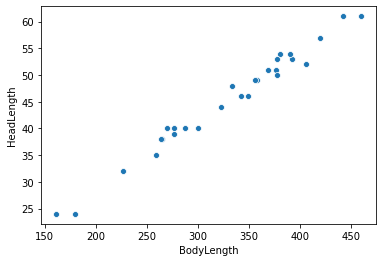

In [101]:
sns.scatterplot(x = df['BodyLength'], y = df['HeadLength'])

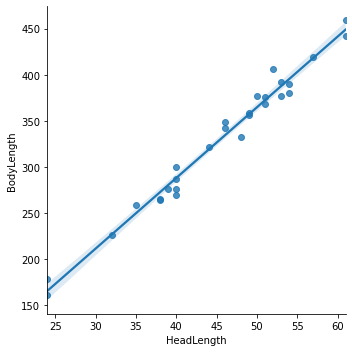

In [102]:
sns.lmplot(data = df, x = 'HeadLength', y = 'BodyLength')

### Linear Regression

In [103]:
X = df['HeadLength']
Y = df['BodyLength']
X = sm.add_constant(X)

In [104]:
model = sm.OLS(Y, X)
print(model)

In [105]:
results = model.fit()
print(results)

In [106]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BodyLength   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.38e-23
Time:                        14:21:18   Log-Likelihood:                -105.32
No. Observations:                  28   AIC:                             214.6
Df Residuals:                      26   BIC:                             217.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2740      9.966     -1.834      0.078     -38.760       2.212
HeadLength     7.6601      0.215     35.588      0.000       7.218       8.103
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.597
Skew:                           0.323   Prob(JB):                        0.742
Kurtosis:                       2.693   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
Y_pred = results.predict(X)

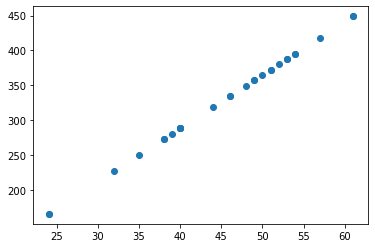

In [108]:
plt.plot(X['HeadLength'], Y_pred, 'o')

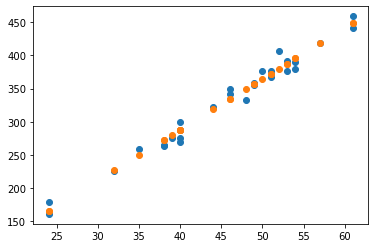

In [109]:
plt.plot(X['HeadLength'], Y, 'o')
plt.plot(X['HeadLength'], Y_pred, 'o')

In [110]:
residuals = Y - Y_pred
residuals

0     -4.568483
1     13.431517
2     -0.849320
3      9.170366
4     -1.130157
5     11.869843
6      7.909215
7    -16.410995
8     25.948587
9     10.007645
10     3.608691
11   -15.371623
12    -7.809948
13    14.909215
14    -8.809948
15     0.928901
16    -4.470053
17    -1.071099
18   -18.130157
19     4.288482
20    -6.992355
21   -10.711518
22     3.229424
23    -5.371623
24    12.268796
25     0.648063
26   -12.130157
27    -4.391309
dtype: float64

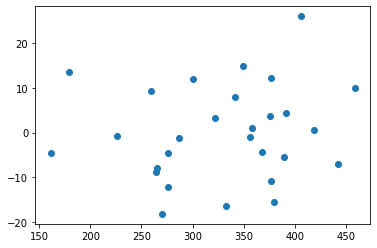

In [111]:
plt.plot(Y, residuals, 'o')

In [112]:
np.sqrt(np.mean(residuals**2)) # RMSE

10.408089501725746

### Using the FitBit dataset

In [113]:
data = pd.read_csv('../../03_data-visualization/02_lab-matplotlib-seaborn/your-code/Fitbit2.csv') 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


steps:
1. correlation matrix
2. scatterplot MinutesOfBeingAwake versus NumberOfAwakings
3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

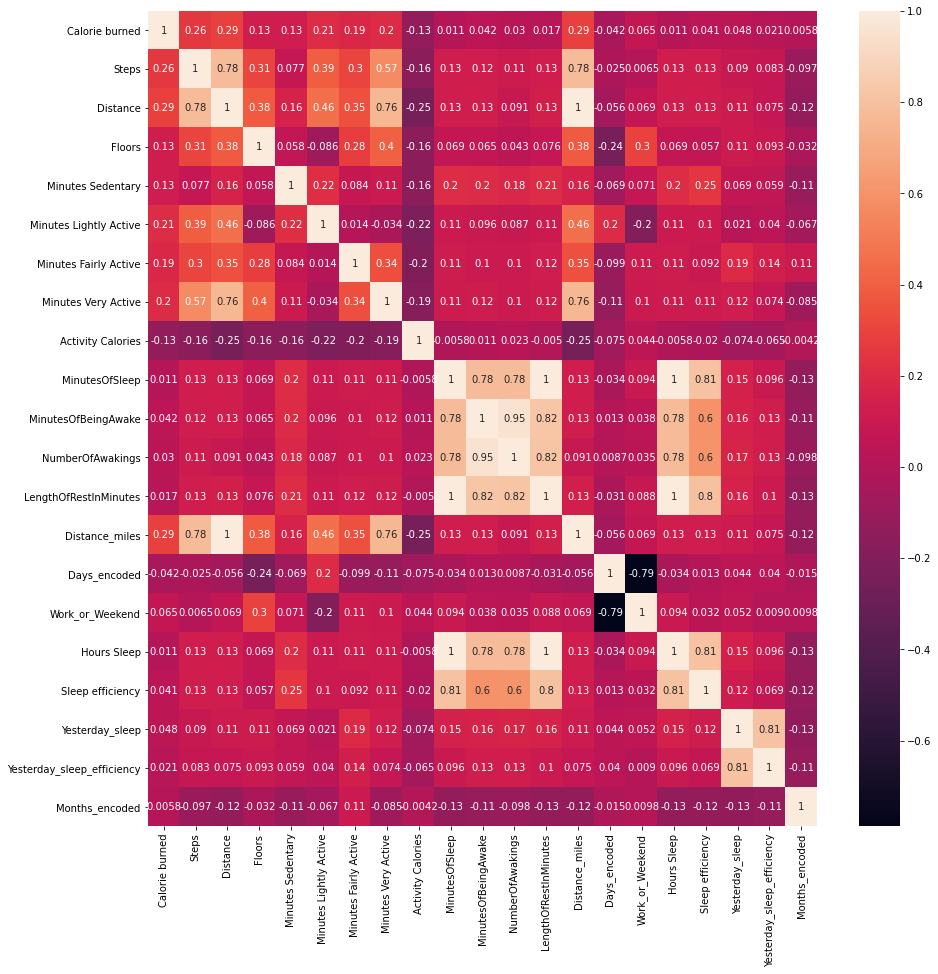

In [114]:
plt.figure(figsize = [15, 15])
sns.heatmap(data.corr(), annot = True)

### Simple Regression Plot

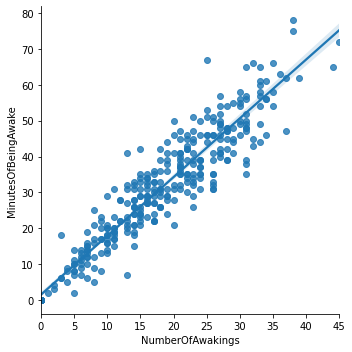

In [115]:
sns.lmplot(data = data, x = 'NumberOfAwakings', y = 'MinutesOfBeingAwake')

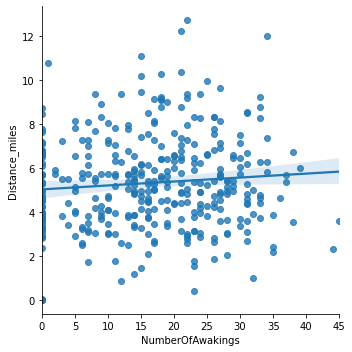

In [116]:
sns.lmplot(data = data, x = 'NumberOfAwakings', y = 'Distance_miles')

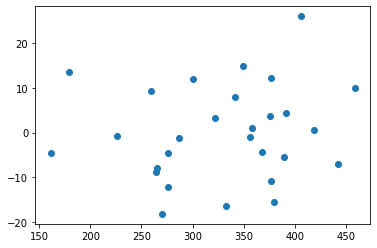

In [117]:
Y_pred = results.predict(X)
residuals = Y - Y_pred
plt.scatter(Y, residuals)

### Estimating OLS using statsmodels
[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

In [118]:
Y = data['MinutesOfBeingAwake']
X = data['NumberOfAwakings']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         14:21:28   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# Y = b0 + b1 * X
# [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]
# [MinutesOfBeingAwake] = 1.4381 + 1.6405 * [NumberOfAwakings]
# NumberOfAwakings = 5
# MinutesOfBeingAwake = 1.4381 + 1.6405 * 5 = 9.64
# NumberOfAwakings = 6
# MinutesOfBeingAwake = 1.4381 + 1.6405 * 6 = 11.28
# interpretation of b1: if we change X by one unit, Y changes by b1 = 1.6405 units

### Estimating OLS using statsmodels
[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings] + b2 * [Distance_miles]

In [120]:
Y = data['MinutesOfBeingAwake']
X = data[['NumberOfAwakings', 'Distance_miles']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     1794.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          3.22e-189
Time:                         14:21:28   Log-Likelihood:                -1154.3
No. Observations:                  367   AIC:                             2315.
Df Residuals:                      364   BIC:                             2326.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5001      0.881     -0.567      0.571      -2.233       1.233
NumberOfAwakings     1.6336      0.028     59.332      0.000       1.579       1.688
Distance_miles       0.3860      0.140      2.761      0.006       0.111       0.661
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.472
Skew:                           0.270   Prob(JB):                     8.89e-08
Kurtosis:                       4.353   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# Y = b0 + b1 * X + b2 * X
# [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings] + b2[Distance_miles]
# [MinutesOfBeingAwake] = -.5001 + 1.6336 * [NumberOfAwakings] + 0.3860 * [Distance_miles]

### Estimating OLS parameters using scipy.stats

#### Confidence Intervals

#### Predictions

### Using sklearn